In [1]:
import pandas as pd
df = pd.read_csv("val_csv_london-4-1-55_across_epochs.csv")
df.head()

,epoch,CSR_MP_sum_y_exceeding_r_x_max,CSR_MP_y_dist_mean_l_inf,CSR_MP_y_dist_mse,CSR_NM_sum_y_exceeding_r_x_max,CSR_NM_y_dist_mean_l_inf,CSR_NM_y_dist_mse,CSR_PM_sum_y_exceeding_r_x_max,CSR_PM_y_dist_mean_l_inf,CSR_PM_y_dist_mse,loss,naive-model-mse,naive-model-non-zero,non_zero_mse,val_loss,val_non_zero_mse
0,0,7114.157333,1096.765636,6.467866e+10,0.0,1064.068786,1.580799e+10,7044.587333,1065.431870,1.610389e+10,2608.839355,1165.091342,3427.976490,8812.072266,1805.179077,6138.520996
1,1,8169.474000,1106.262838,6.280518e+10,0.0,1063.188326,1.566438e+10,6989.567333,1056.655675,1.576640e+10,1232.945679,1165.598859,3429.296684,3938.965088,1253.818115,4153.084961
2,2,6781.817333,1095.827283,6.444753e+10,0.0,1048.408573,1.581184e+10,6824.566667,1063.197098,1.577251e+10,1063.788696,1161.517623,3418.080862,3317.390869,848.620667,2558.016113
3,3,7858.369333,1098.570501,6.384654e+10,0.0,1067.496227,1.614564e+10,6704.086000,1059.464253,1.583908e+10,973.580872,1161.547704,3414.433360,3014.038818,915.735962,2902.321777
4,4,7883.560667,1103.140441,6.227679e+10,0.0,1055.052719,1.560398e+10,6743.036000,1054.003347,1.584013e+10,904.343201,1163.125670,3424.582104,2766.890137,1065.084839,3167.624756


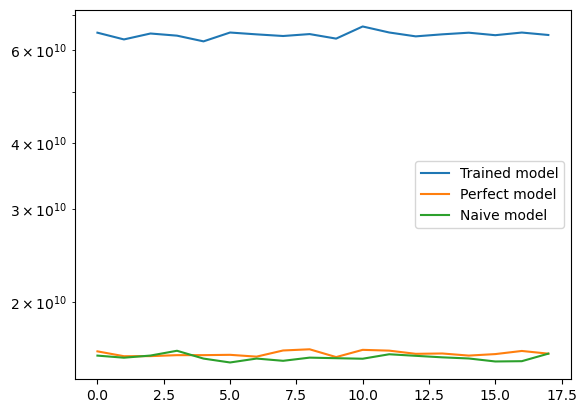

In [4]:
x = df["epoch"].tolist()
cx_MP = df["CSR_MP_y_dist_mse"].tolist()
cx_PM = df["CSR_PM_y_dist_mse"].tolist()
cx_NM = df["CSR_NM_y_dist_mse"].tolist()

val_mse = df["val_loss"].tolist()

import matplotlib.pyplot as plt
plt.plot(x, cx_MP, label = "Trained model")
plt.plot(x, cx_PM, label = "Perfect model")
plt.plot(x, cx_NM, label = "Naive model")
plt.legend()
plt.yscale('log')
plt.show()

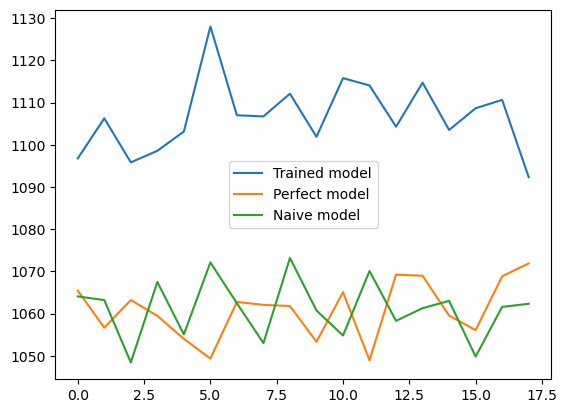

In [6]:
x = df["epoch"].tolist()
cx_MP = df["CSR_MP_y_dist_mean_l_inf"].tolist()
cx_PM = df["CSR_PM_y_dist_mean_l_inf"].tolist()
cx_NM = df["CSR_NM_y_dist_mean_l_inf"].tolist()

val_mse = df["val_loss"].tolist()

import matplotlib.pyplot as plt
plt.plot(x, cx_MP, label = "Trained model")
plt.plot(x, cx_PM, label = "Perfect model")
plt.plot(x, cx_NM, label = "Naive model")
plt.legend()
# plt.yscale('log')
plt.show()

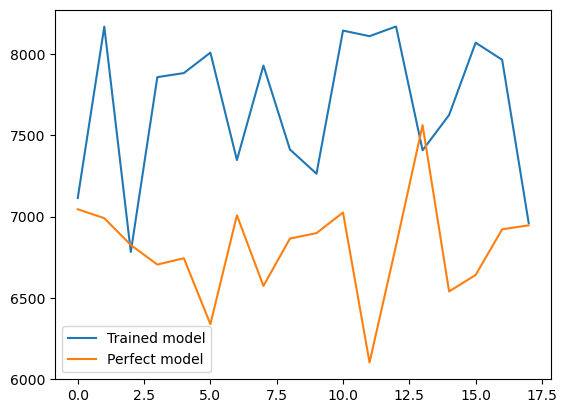

In [9]:
x = df["epoch"].tolist()
cx_MP = df["CSR_MP_sum_y_exceeding_r_x_max"].tolist()
cx_PM = df["CSR_PM_sum_y_exceeding_r_x_max"].tolist()
cx_NM = df["CSR_NM_sum_y_exceeding_r_x_max"].tolist()

val_mse = df["val_loss"].tolist()

import matplotlib.pyplot as plt
plt.plot(x, cx_MP, label = "Trained model")
plt.plot(x, cx_PM, label = "Perfect model")
# plt.plot(x, cx_NM, label = "Naive model")
plt.legend()
# plt.yscale('log')
plt.show()